In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
DATA_PATH = 'C:/Users/campus3S031/Desktop/iMBank/iM_DiGital_Banker_academy/projects/iMBank_pj1/sampled_data'
data_21 = pd.read_csv(f'{DATA_PATH}/merged_full_2021.csv')
data_22 = pd.read_csv(f'{DATA_PATH}/merged_full_2022.csv')
data_23 = pd.read_csv(f'{DATA_PATH}/merged_full_2023.csv')


In [73]:
print(data_21.shape, data_22.shape, data_23.shape)

(780608, 19) (811051, 19) (841770, 19)


## 우수고객 수 조회
- 충성고객이란 카드 사용 기록도 있으면서 동시에 수신 기록도 있는 사람들
- 이 사람들은 iM뱅크와의 연결을 끊지는 않을 것이다!
- 즉, 두 테이블을 합친 데이터에서 NaN이 없어야 한다!

In [74]:
# 우수고객 수 -> 우상향...이긴 하다.

tmp_21 = data_21.dropna()
tmp_22 = data_22.dropna()
tmp_23 = data_23.dropna()
print(tmp_21.shape, tmp_22.shape, tmp_23.shape)

(69287, 19) (71285, 19) (73912, 19)


In [75]:
tmp_21['연령대'].value_counts()

연령대
50대      15997
40대      15092
20대      13004
60대이상    11098
30대      11088
10대미만     3008
Name: count, dtype: int64

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Deskt

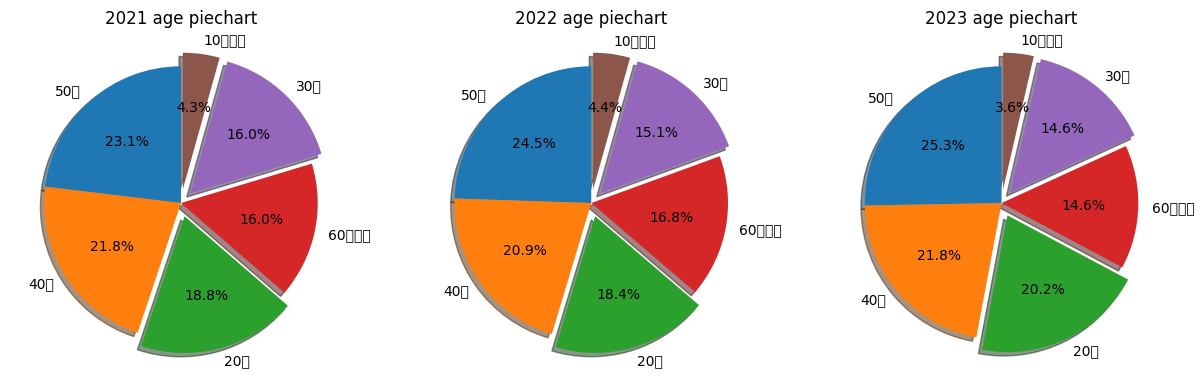

In [76]:
explode = (0,0,0.1,0,0.1,0.1)

fig, ax = plt.subplots(1,3,figsize = (15,5))

age_counts_21 = tmp_21['연령대'].value_counts()
labels = age_counts_21.index.tolist()

ax[0].pie(tmp_21['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[0].set_title("2021 age piechart")

ax[1].pie(tmp_22['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[1].set_title("2022 age piechart")

ax[2].pie(tmp_23['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[2].set_title("2023 age piechart")

plt.show()

## MZ 조회 및 연령대 시각화
- MZ는 10대, 20대, 30대를 포함한다.
- '문제 선정' 파트에 사용 가능할 것 같다
- MZ 확보가 절실함

In [77]:
tmp_21 = data_21[data_21['연령대'].isin(['10대미만','20대','30대'])]
tmp_22 = data_22[data_22['연령대'].isin(['10대미만','20대','30대'])]
tmp_23 = data_23[data_23['연령대'].isin(['10대미만','20대','30대'])]

print(f'{tmp_21['연령대'].value_counts()} \n ----------- \n {tmp_22['연령대'].value_counts()} \n ------------ \n {tmp_23['연령대'].value_counts()}')

연령대
20대      37198
30대      35611
10대미만    16218
Name: count, dtype: int64 
 ----------- 
 연령대
20대      37661
30대      36616
10대미만    15837
Name: count, dtype: int64 
 ------------ 
 연령대
20대      39497
30대      39335
10대미만    14860
Name: count, dtype: int64


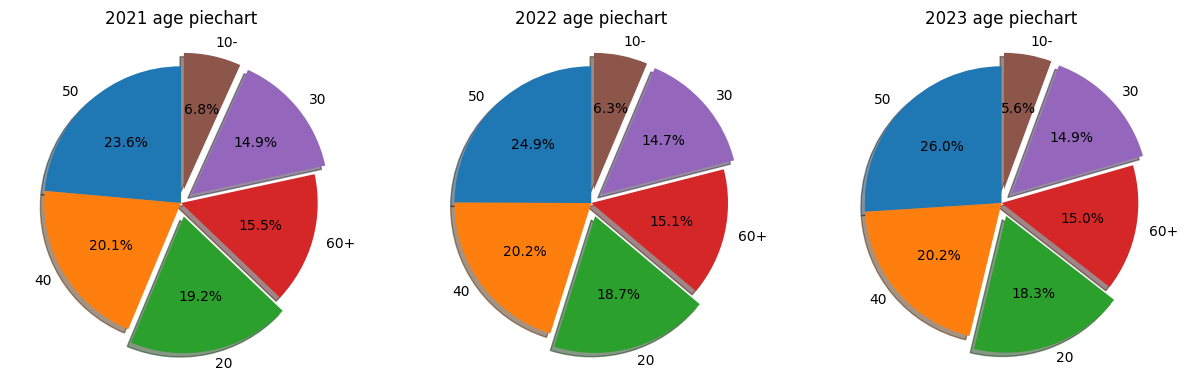

In [78]:
explode = (0,0,0.1,0,0.1,0.1)

fig, ax = plt.subplots(1,3,figsize = (15,5))

labels = ['50', '40', '20', '60+', '30', '10-']
ax[0].pie(data_21['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[0].set_title("2021 age piechart")

ax[1].pie(data_22['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[1].set_title("2022 age piechart")

ax[2].pie(data_23['연령대'].value_counts(), 
       explode=explode,
       labels = labels, 
       autopct = '%1.1f%%',
       shadow = True, startangle= 90)
ax[2].set_title("2023 age piechart")

plt.show()

# Data Grouping
- MZ가 타겟이니 20 ~ 30대를 타겟으로 잡아보자
- 소비 패턴을 먼저 잡아내야 하니 카드 데이터 위주로 일단 보자.
- 수신/여신 데이터로는 어떤 패턴을 파악 할 수 있을까?

In [79]:
data_21.head(3)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,기준년월,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,NaN,2800588947,NaN,NaN,NaN,NaN,NaN,202112.0,30대,남,일반등급,경기도,고양시 일산서구,100000.0,0.0,0.0,0.0,0.0,100000.0
1,NaN,2800758915,NaN,NaN,NaN,NaN,NaN,202112.0,30대,여,일반등급,경상북도,안동시,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,2801252987,NaN,NaN,NaN,NaN,NaN,202112.0,40대,남,일반등급,대구광역시,달서구,0.0,0.0,0.0,0.0,0.0,0.0
